In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
plt.set_cmap('binary')

<Figure size 432x288 with 0 Axes>

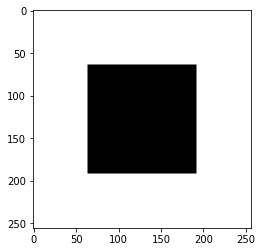

In [3]:
N = 256
Z = np.zeros((N//4,N//4))
O = np.ones((N//4,N//4))
X = np.block([[Z,Z,Z,Z],[Z,O,O,Z],[Z,O,O,Z],[Z,Z,Z,Z]])
plt.imshow(X)
plt.show()

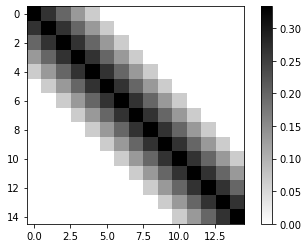

In [4]:
c = np.zeros(N)
s = 5
c[:s] = (s - np.arange(0,s))/(3*s)
Ac = la.toeplitz(c)

plt.imshow(Ac[:15,:15])
plt.colorbar()
plt.show()

In [5]:
np.linalg.cond(Ac)

24782.3310425676

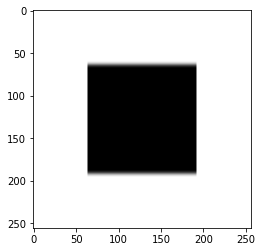

In [6]:
plt.imshow(Ac @ X)
plt.show()

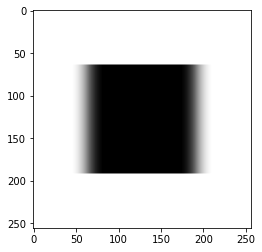

In [7]:
r = np.zeros(N)
s = 20
r[:s] = (s - np.arange(0,s))/(3*s)
Ar = la.toeplitz(r)

plt.imshow(X @ Ar.T)
plt.show()

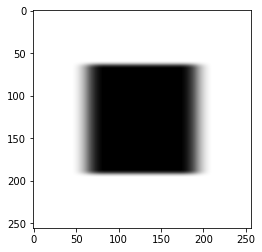

In [8]:
plt.imshow(Ac @ X @ Ar.T)
plt.show()

(256, 256)


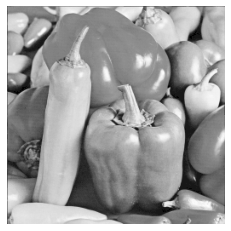

In [20]:
import cv2
peppers = cv2.imread('peppers.png', cv2.IMREAD_GRAYSCALE).astype(np.float64)
print(peppers.shape)
plt.imshow(peppers,cmap='gray')
plt.axis('off')
plt.show()

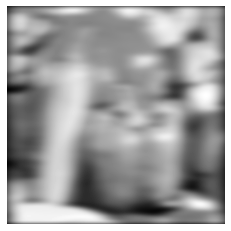

In [23]:
B = Ac@peppers@Ar.T + 0.01*np.random.randn(256,256)
plt.imshow(B,cmap='gray')
plt.axis('off')
plt.show()

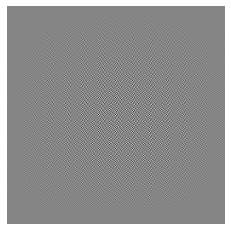

In [24]:
X1 = la.solve(Ac,B)
X2 = la.solve(Ar,X1.T)
X2 = X2.T
plt.imshow(X2,cmap='gray')
plt.axis('off')
plt.show()

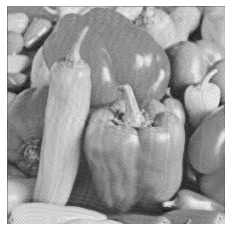

In [25]:
Pc,Sc,QTc = la.svd(Ac)
Pr,Sr,QTr = la.svd(Ar)

k = 200
Dc_k_plus = np.hstack([1/Sc[:k],np.zeros(N-k)])
Dr_k_plus = np.hstack([1/Sr[:k],np.zeros(N-k)])
Ac_k_plus = QTc.T @ np.diag(Dc_k_plus) @ Pc.T
Ar_k_plus = Pr @ np.diag(Dr_k_plus) @ QTr
X = Ac_k_plus @ B @ Ar_k_plus
plt.imshow(X,cmap='gray')
plt.axis('off')
plt.show()